# RED WINE QUALITY


#Import Data

In [ ]:
!pip install graphviz dtreeviz
!mkdir data
 
import warnings; warnings.simplefilter('ignore')
 
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
sns.set(style="ticks", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
import warnings; warnings.simplefilter('ignore')

     |████████████████████████████████| 51kB 2.2MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.4-cp36-none-any.whl size=53568 sha256=c8d4b1cc92d5411bd15ef68ce838c3d6b24ed3b0cb8ac56b527e4505a82a504e
  Stored in directory: /root/.cache/pip/wheels/6a/1b/01/8d804e4d3cf01cf38097a756b02c851a032c09e3a25feb7c50
Successfully built dtreeviz


In [ ]:
#Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/RNN Real 300.xlsx')

In [ ]:
df.head(7)

,Date,File,Video,Kelas,Diskusi
0,2020-01-02,0.625,0.015625,0.000000,0.523810
1,2020-01-03,0.375,0.046875,0.291667,0.095238
2,2020-01-06,0.500,0.015625,0.354167,1.000000
3,2020-01-07,0.750,0.125000,0.000000,0.095238
4,2020-01-08,0.375,0.250000,0.500000,0.952381
5,2020-01-09,0.500,0.812500,0.500000,0.095238
6,2020-01-10,0.750,1.281250,0.375000,0.285714


In [ ]:
df.tail(6)

,Date,File,Video,Kelas,Diskusi
294,2020-10-28,1.000,0.015625,0.125000,0.095238
295,2020-10-29,0.500,0.125000,0.125000,0.190476
296,2020-10-30,1.000,0.062500,0.541667,0.095238
297,2020-10-31,1.000,0.062500,0.375000,0.095238
298,2020-11-01,0.750,0.031250,0.375000,0.190476
299,2020-11-02,0.625,0.015625,0.000000,0.523810


In [ ]:
df.info()
#Terlihat dari semua variabel sudah tidak ada yang missing dan noise, sehingga kami bisa melanjutkan ke visualisasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     300 non-null    datetime64[ns]
 1   File     300 non-null    float64       
 2   Video    300 non-null    float64       
 3   Kelas    300 non-null    float64       
 4   Diskusi  300 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.8 KB


#VISUALISASI DATA

In [ ]:
#untuk tau kuantitas dari setiap kategori pada variabel kualitas
df['quality'].value_counts(normalize=True) 

1    0.523613
0    0.476387
Name: quality, dtype: float64

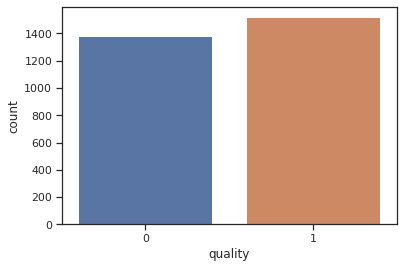

In [ ]:
import seaborn as sns
sns.countplot(x=df['quality'])

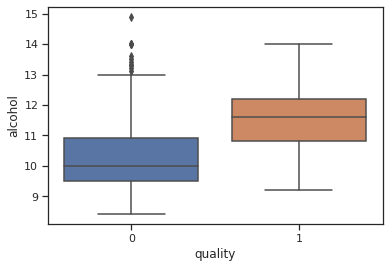

In [ ]:
#hubungan alkohol terhadap kualitas red wine
p = sns.boxplot(x="quality", y="alcohol", data=df)

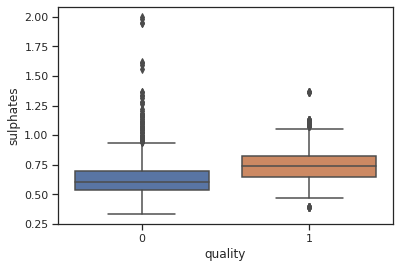

In [ ]:
#hubungan sulphates terhadap kualitas red wine
p = sns.boxplot(x="quality", y="sulphates", data=df)

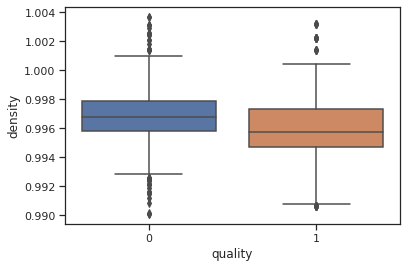

In [ ]:
#hubungan density terhadap kualitas red wine
p = sns.boxplot(x="quality", y="density", data=df)

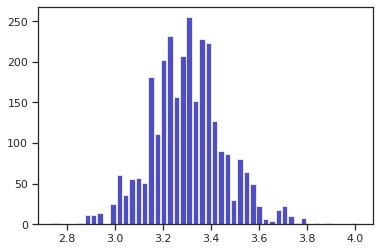

In [ ]:
n, bins, patches = plt.hist(x=df['pH'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

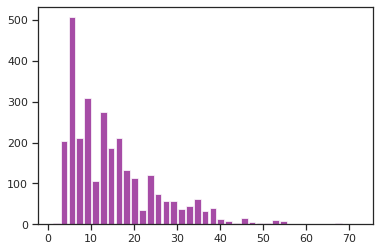

In [ ]:
n, bins, patches = plt.hist(x=df['freesulfurdioxide'], bins='auto', color='purple',
                            alpha=0.7, rwidth=0.85)

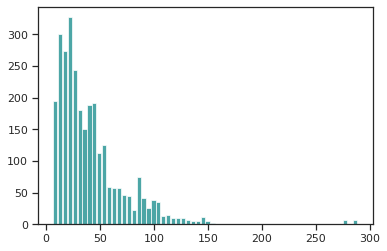

In [ ]:
n, bins, patches = plt.hist(x=df['totalsulfurdioxide'], bins='auto', color='teal',
                            alpha=0.7, rwidth=0.85)


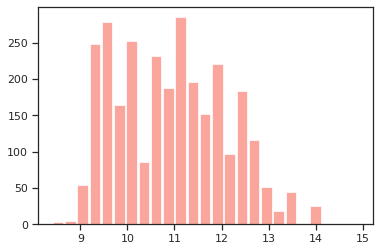

In [ ]:
n, bins, patches = plt.hist(x=df['alcohol'], bins='auto', color='salmon',
                            alpha=0.7, rwidth=0.85)


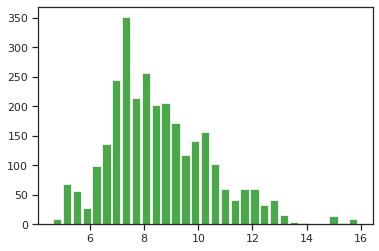

In [ ]:
n, bins, patches = plt.hist(x=df['fixedacidity'], bins='auto', color='green',
                            alpha=0.7, rwidth=0.85)

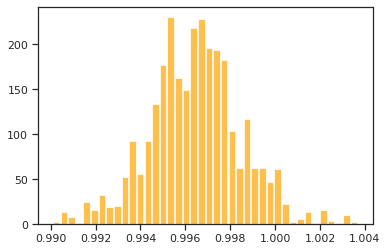

In [ ]:
n, bins, patches = plt.hist(x=df['density'], bins='auto', color='orange',
                            alpha=0.7, rwidth=0.85)

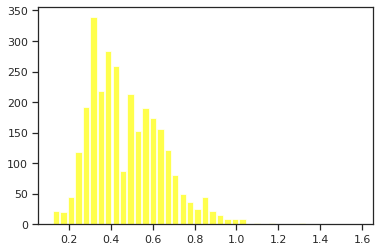

In [ ]:
n, bins, patches = plt.hist(x=df['volatileacidity'], bins='auto', color='yellow',
                            alpha=0.7, rwidth=0.85)

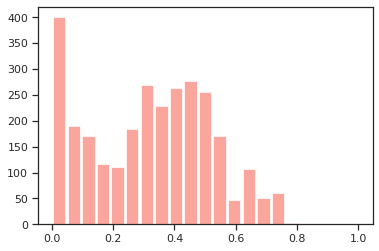

In [ ]:
n, bins, patches = plt.hist(x=df['citricacid'], bins='auto', color='salmon',
                            alpha=0.7, rwidth=0.85)

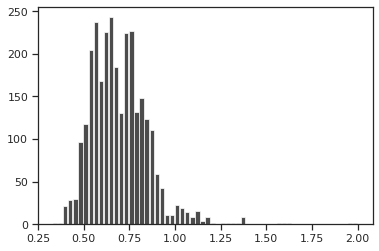

In [ ]:
n, bins, patches = plt.hist(x=df['sulphates'], bins='auto', color='black',
                            alpha=0.7, rwidth=0.85)

#Klasifikasi dengan Pemodelan Regresi Logistik


#Model 1 : Model Regresi Total


Model Regresi Total


In [ ]:
df['quality'] = df['quality'].astype('category')
X = df[['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide','totalsulfurdioxide','density','pH','sulphates','alcohol']]
Y = df['quality']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(2030, 11) 871


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, Y_train)

In [ ]:
Y_reglog = clf.predict(X_test)
Y_reglog

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,

In [ ]:
#Akurasi Model 1
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_reglog)


0.8048220436280138

In [ ]:
#Model Regresi Logistik Total
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.430225
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.378    
Dependent Variable:   quality           AIC:               2518.1645
Date:                 2021-01-06 05:53  BIC:               2583.8654
No. Observations:     2901              Log-Likelihood:    -1248.1  
Df Model:             10                LL-Null:           -2007.6  
Df Residuals:         2890              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
--------------------------------------------------------------------
fixedacidity         0.1231   0.0487  2.5267 0.0115   0.0276  0.2185
volatileacidity     -3.3352 

In [ ]:
#Akurasi, Presisi dan Recall dari Model 1 : Model Regresi Logistik Total
from sklearn.metrics import precision_score, recall_score, f1_score

print('presisi = ', precision_score(Y_test, Y_reglog))
print('Recall = ', recall_score(Y_test, Y_reglog))
print('f1_score = ', f1_score(Y_test, Y_reglog))

presisi =  0.7705263157894737
Recall =  0.8571428571428571
f1_score =  0.811529933481153


#Model 2 : Model Regresi Logistik tanpa Variabel yang Signifikan yaitu 

In [ ]:
X1 = df[['fixedacidity','volatileacidity','residualsugar','chlorides','totalsulfurdioxide','density','sulphates','alcohol']]
Y = df['quality']
seed = 9
validation_size = 0.3
X_train1, X_test1, Y_train, Y_test = model_selection.train_test_split(X1, Y, test_size=validation_size, random_state=seed)

In [ ]:
#Model Regresi Logistik Tanpa Variabel yang Tidak Signifikan
import statsmodels.api as sm
logit_model1=sm.Logit(Y,X1)
result1=logit_model1.fit()

clf = LogisticRegression().fit(X_train1, Y_train)
Y_reglog1 = clf.predict(X_test1)
Y_reglog1
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.431544
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.376    
Dependent Variable:   quality            AIC:                2519.8200
Date:                 2021-01-06 05:53   BIC:                2567.6025
No. Observations:     2901               Log-Likelihood:     -1251.9  
Df Model:             7                  LL-Null:            -2007.6  
Df Residuals:         2893               LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
fixedacidity         0.1577   0.0282   5.5940 0.0000   0.1024   0.2130
vol

In [ ]:
#Akurasi, Presisi dan Recall dari Model 2 : Model Regresi Logistik Tanpa Variabel yang Tidak Signifikan
from sklearn.metrics import precision_score, recall_score, f1_score

print('presisi = ', precision_score(Y_test, Y_reglog1))
print('Recall = ', recall_score(Y_test, Y_reglog1))
print('f1_score = ', f1_score(Y_test, Y_reglog1))

presisi =  0.7752100840336135
Recall =  0.8641686182669789
f1_score =  0.8172757475083057


In [ ]:
#Akurasi Model 2
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_reglog1)

0.8105625717566016

In [ ]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score
import time

mulai = time.time()
scores_regLog = cross_val_score(clf, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.80 (+/- 0.10), Waktu = 0.769 detik


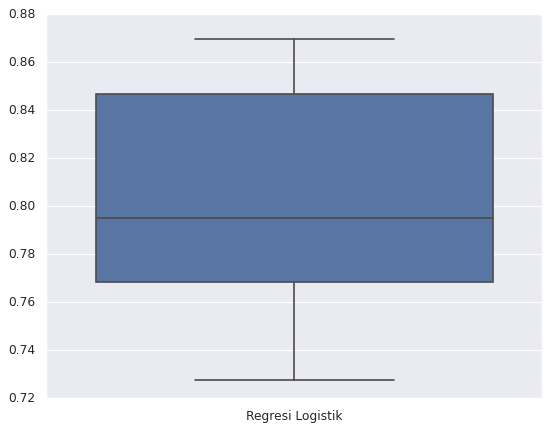

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.style.use('classic')
import seaborn as sns; sns.set()

df = pd.DataFrame({'Regresi Logistik':scores_regLog})
sns.boxplot(data=df)
plt.show()

#Naive Bayes Classif

In [ ]:
#from sklearn.datasets import load_wine
#X, Y = load_wine(return_X_y=True)
#set(Y) # 3 Kategori

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
nbc = gnb.fit(X_train, Y_train)
nbc_prediction = nbc.predict(X_test)

print('Akurasi = ', accuracy_score(Y_test, nbc_prediction))
print(confusion_matrix(Y_test, nbc_prediction))
print(classification_report(Y_test, nbc_prediction))
# Hati-hati Sparse ==> Dense bisa memenuhi memory untuk data relatif cukup besar
# Akurasi cukup baik

Akurasi =  0.7680826636050516
[[316 128]
 [ 74 353]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       444
           1       0.73      0.83      0.78       427

    accuracy                           0.77       871
   macro avg       0.77      0.77      0.77       871
weighted avg       0.77      0.77      0.77       871



In [ ]:
from sklearn import neighbors

n_neighbors = 3
weights = 'distance'
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
kNN.fit(X_train, Y_train)
print('Done!')

Done!


In [ ]:
y_kNN = kNN.predict(X_test)
y_kNN[-10:]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
accuracy_score(Y_test, y_kNN)

0.9334098737083811

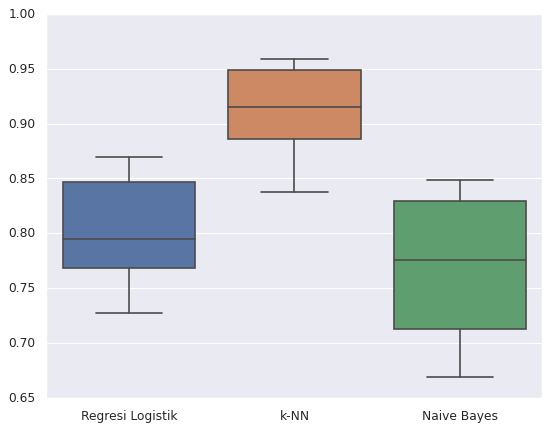

In [ ]:
df = pd.read_csv("redwine.csv")
X = df[['fixedacidity','volatileacidity','citricacid','residualsugar','chlorides','freesulfurdioxide','totalsulfurdioxide','density','pH','sulphates','alcohol']]
Y = df['quality']

Models = [('Regresi Logistik',clf), ('k-NN',kNN), ('Naive Bayes',gnb)]
Scores = {}
for model_name, model in Models:
    if model_name=='Naive Bayes':
        Scores[model_name] = cross_val_score(model, X.values, Y, cv=10,scoring='accuracy')
    else:
        Scores[model_name] = cross_val_score(model, X, Y, cv=10,scoring='accuracy')
        
dt = pd.DataFrame.from_dict(Scores)
ax = sns.boxplot(data=dt)

In [ ]:
print('presisi reglog= ', precision_score(Y_test, Y_reglog1))
print('Recall reglog= ', recall_score(Y_test, Y_reglog1))
print('f1_score reglog= ', f1_score(Y_test, Y_reglog1))

print('presisi naive-bayes= ', precision_score(Y_test, nbc_prediction))
print('Recall naive-bayes= ', recall_score(Y_test, nbc_prediction))
print('f1_score naive-bayes= ', f1_score(Y_test, nbc_prediction))


presisi reglog=  0.7752100840336135
Recall reglog=  0.8641686182669789
f1_score reglog=  0.8172757475083057
presisi naive-bayes=  0.7338877338877339
Recall naive-bayes=  0.8266978922716628
f1_score naive-bayes=  0.7775330396475771


# Decision Tree

In [ ]:
from sklearn import tree

DT = tree.DecisionTreeClassifier(max_depth = 3, 
                             random_state = 0) 
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(X_train1, Y_train)
Y_DT = DT.predict(X_test1)
print(accuracy_score(Y_test, Y_DT))
print(confusion_matrix(Y_test, Y_DT))
print(classification_report(Y_test, Y_DT))

0.8071182548794489
[[348  96]
 [ 72 355]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       444
           1       0.79      0.83      0.81       427

    accuracy                           0.81       871
   macro avg       0.81      0.81      0.81       871
weighted avg       0.81      0.81      0.81       871



In [ ]:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)
print(accuracy)

In [ ]:
DT.feature_importances_

array([0.07815912, 0.10657789, 0.        , 0.        , 0.        ,
       0.        , 0.05503541, 0.76022758])

In [ ]:
import graphviz

dot_data = tree.export_graphviz(DT, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("quality") 
var_names = ['sulphates','alcohol','chlorides','volatileacidity','totalsulfurdioxide','density','residualsugar','fixedacidity']
categories = ['1', '0']
dot_data = tree.export_graphviz(DT, out_file=None, 
                         feature_names = var_names,  
                         class_names=categories,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  

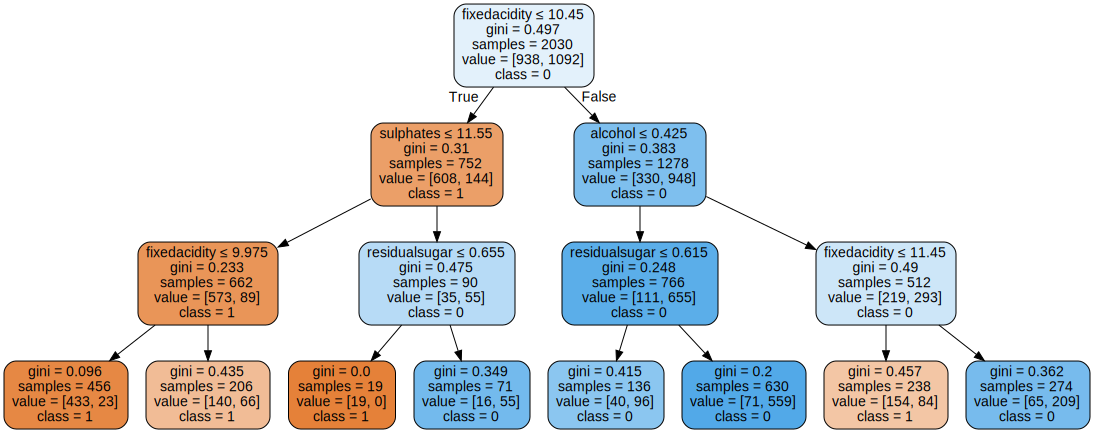

In [ ]:
graph